EARTHQUAKE DATASET PRE-MODELLING VISUALIZATION.

PREDICTION: Level of damage to buildings (Ordered categorical variable).

TO FIND: Relationship between other variables and 'damage grade':
- Numeric building parameters. (Linear regression)
- Unordered categorical building parameters. (Clustering)
- Binary construction material parameters. (Correlation)

PROBLEM STATEMENT:
- Determining the extent of damage to a building during an earthquake has the impact of identifying which buildings are less likely to collapse when an earthquake strikes, which would reduce the number of people at risk of death or injury.

In [1]:
# Import Basic Libraries.
import numpy as np
import pandas as pd

# Import libraries for graph plotting. Only pyplot is needed. Use Seaborn style for graphics.
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [2]:
# Read dataset from file.
earthquake_data = pd.read_csv('Dataset 2 - Earthquake Training Values.csv')
# Display the data.
earthquake_data

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,land_surface_condition,foundation_type,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
0,802906,6,487,12198,2,30,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
1,28830,8,900,2812,2,10,8,7,o,r,...,0,0,0,0,0,0,0,0,0,2
2,94947,21,363,8973,2,10,5,5,t,r,...,0,0,0,0,0,0,0,0,0,3
3,590882,22,418,10694,2,10,6,5,t,r,...,0,0,0,0,0,0,0,0,0,2
4,201944,11,131,1488,3,30,8,9,t,r,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
260596,688636,25,1335,1621,1,55,6,3,n,r,...,0,0,0,0,0,0,0,0,0,2
260597,669485,17,715,2060,2,0,6,5,t,r,...,0,0,0,0,0,0,0,0,0,3
260598,602512,17,51,8163,3,55,6,7,t,r,...,0,0,0,0,0,0,0,0,0,3
260599,151409,26,39,1851,2,10,14,6,t,r,...,0,0,0,0,0,0,0,0,0,2


In [3]:
# Determine dataframe type and shape.
print("Data type : ", type(earthquake_data))
# Display dataframe dimensions (rows and columns).
print("Data dimensions : ", earthquake_data.shape)
# Determine the data types of the variables in the dataset.
earthquake_data.info()

Data type :  <class 'pandas.core.frame.DataFrame'>
Data dimensions :  (260601, 40)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                  

In [4]:
# Get a brief summary of the statistics of the values in the dataframe.
earthquake_data.describe()

,building_id,geo_level_1_id,geo_level_2_id,geo_level_3_id,count_floors_pre_eq,age,area_percentage,height_percentage,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,...,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other,damage_grade
count,2.606010e+05,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,...,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000,260601.000000
mean,5.256755e+05,13.900353,701.074685,6257.876148,2.129723,26.535029,8.018051,5.434365,0.088645,0.761935,...,0.033626,0.008101,0.000940,0.000361,0.001071,0.000188,0.000146,0.000088,0.005119,2.238272
std,3.045450e+05,8.033617,412.710734,3646.369645,0.727665,73.565937,4.392231,1.918418,0.284231,0.425900,...,0.180265,0.089638,0.030647,0.018989,0.032703,0.013711,0.012075,0.009394,0.071364,0.611814
min,4.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.611900e+05,7.000000,350.000000,3073.000000,2.000000,10.000000,5.000000,4.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,5.257570e+05,12.000000,702.000000,6270.000000,2.000000,15.000000,7.000000,5.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,7.897620e+05,21.000000,1050.000000,9412.000000,2.000000,30.000000,9.000000,6.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,1.052934e+06,30.000000,1427.000000,12567.000000,9.000000,995.000000,100.000000,32.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# Convert the superstructure variable types to boolean.
earthquake_data['has_superstructure_adobe_mud'] = earthquake_data['has_superstructure_adobe_mud'].astype('bool')
earthquake_data['has_superstructure_mud_mortar_stone'] = earthquake_data['has_superstructure_mud_mortar_stone'].astype('bool')
earthquake_data['has_superstructure_stone_flag'] = earthquake_data['has_superstructure_stone_flag'].astype('bool')
earthquake_data['has_superstructure_cement_mortar_stone'] = earthquake_data['has_superstructure_cement_mortar_stone'].astype('bool')
earthquake_data['has_superstructure_mud_mortar_brick'] = earthquake_data['has_superstructure_mud_mortar_brick'].astype('bool')
earthquake_data['has_superstructure_cement_mortar_brick'] = earthquake_data['has_superstructure_cement_mortar_brick'].astype('bool')
earthquake_data['has_superstructure_timber'] = earthquake_data['has_superstructure_timber'].astype('bool')
earthquake_data['has_superstructure_bamboo'] = earthquake_data['has_superstructure_bamboo'].astype('bool')
earthquake_data['has_superstructure_rc_non_engineered'] = earthquake_data['has_superstructure_rc_non_engineered'].astype('bool')
earthquake_data['has_superstructure_rc_engineered'] = earthquake_data['has_superstructure_rc_engineered'].astype('bool')
earthquake_data['has_superstructure_other'] = earthquake_data['has_superstructure_other'].astype('bool')

# Convert the secondary use variable types to boolean.
earthquake_data['has_secondary_use'] = earthquake_data['has_secondary_use'].astype('bool')
earthquake_data['has_secondary_use_agriculture'] = earthquake_data['has_secondary_use_agriculture'].astype('bool')
earthquake_data['has_secondary_use_hotel'] = earthquake_data['has_secondary_use_hotel'].astype('bool')
earthquake_data['has_secondary_use_rental'] = earthquake_data['has_secondary_use_rental'].astype('bool')
earthquake_data['has_secondary_use_institution'] = earthquake_data['has_secondary_use_institution'].astype('bool')
earthquake_data['has_secondary_use_school'] = earthquake_data['has_secondary_use_school'].astype('bool')
earthquake_data['has_secondary_use_industry'] = earthquake_data['has_secondary_use_industry'].astype('bool')
earthquake_data['has_secondary_use_health_post'] = earthquake_data['has_secondary_use_health_post'].astype('bool')
earthquake_data['has_secondary_use_gov_office'] = earthquake_data['has_secondary_use_gov_office'].astype('bool')
earthquake_data['has_secondary_use_use_police'] = earthquake_data['has_secondary_use_use_police'].astype('bool')
earthquake_data['has_secondary_use_other'] = earthquake_data['has_secondary_use_other'].astype('bool')

earthquake_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260601 entries, 0 to 260600
Data columns (total 40 columns):
building_id                               260601 non-null int64
geo_level_1_id                            260601 non-null int64
geo_level_2_id                            260601 non-null int64
geo_level_3_id                            260601 non-null int64
count_floors_pre_eq                       260601 non-null int64
age                                       260601 non-null int64
area_percentage                           260601 non-null int64
height_percentage                         260601 non-null int64
land_surface_condition                    260601 non-null object
foundation_type                           260601 non-null object
roof_type                                 260601 non-null object
ground_floor_type                         260601 non-null object
other_floor_type                          260601 non-null object
position                                  260601 non

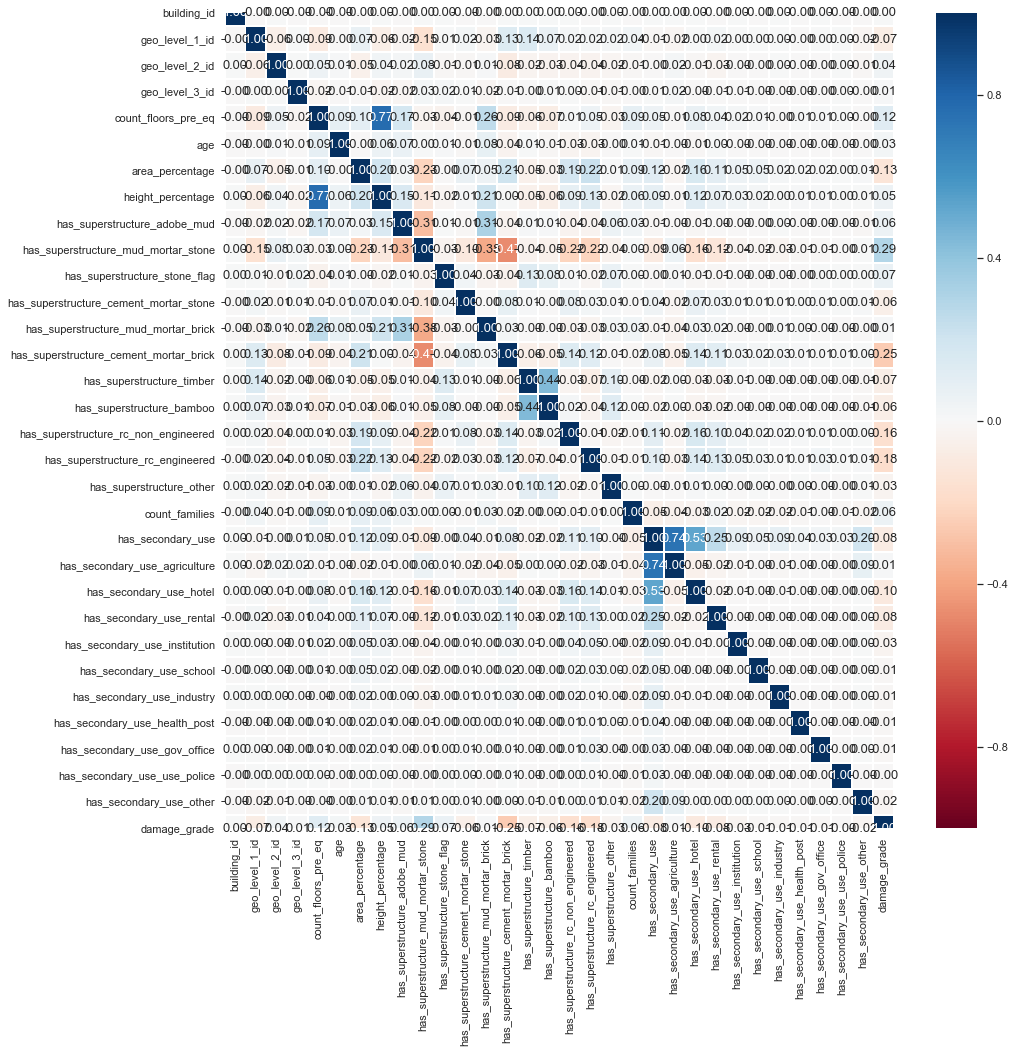

In [7]:
# Using visualization of correlation, get a sensing of which variables are likely to affect the prediction the greatest.
f, axes = plt.subplots(1, 1, figsize = (15, 15))
sb.heatmap(earthquake_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
annot = True, fmt = ".2f", annot_kws = {"size": 13}, cmap = "RdBu")

# Note: Blue indicates a positive correlation, or greater extent of damage.
# Red indicates a negative correlation, or lesser extent of damage.

VISUALIZE EACH OF THE NUMERIC INTEGER VARIABLES OF INTEREST USING THE RAW DATA FROM THE DATASET TO GAUGE HOW THEY AFFECT THE PREDICTOR 'DAMAGE_GRADE'.

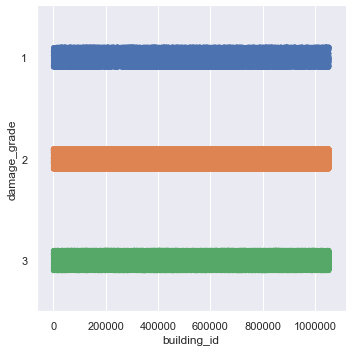

In [6]:
# Observe the relationship between the the building ID and its damage grade.
sb.catplot(x = "building_id", y = "damage_grade", data = earthquake_data, orient = "h")

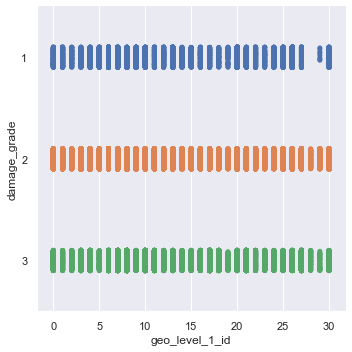

In [7]:
# Observe the relationship between the geographical level 1 ID and its damage grade.
sb.catplot(x = "geo_level_1_id", y = "damage_grade", data = earthquake_data, orient = "h")

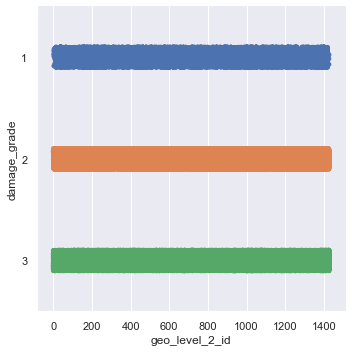

In [8]:
# Observe the relationship between the geographical level 2 ID and its damage grade.
sb.catplot(x = "geo_level_2_id", y = "damage_grade", data = earthquake_data, orient = "h")

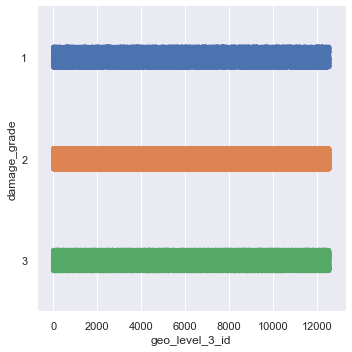

In [9]:
# Observe the relationship between the geographical level 3 ID and its damage grade.
sb.catplot(x = "geo_level_3_id", y = "damage_grade", data = earthquake_data, orient = "h")

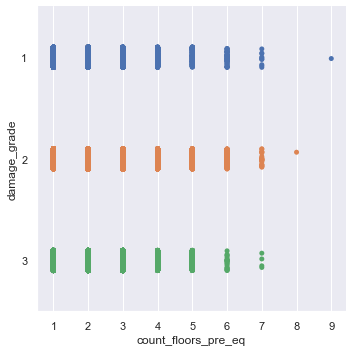

In [10]:
# Observe the relationship between the number of floors in a building and its damage grade.
sb.catplot(x = "count_floors_pre_eq", y = "damage_grade", data = earthquake_data, orient = "h")

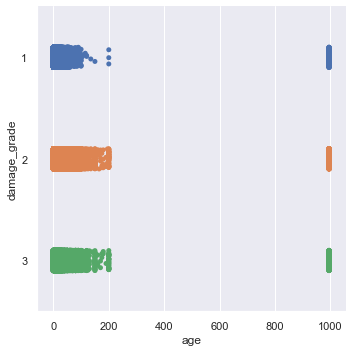

In [11]:
# Observe the relationship between the age of a building and its damage grade.
sb.catplot(x = "age", y = "damage_grade", data = earthquake_data, orient = "h")

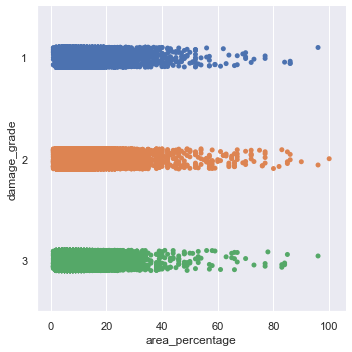

In [12]:
# Observe the relationship between the land surface area of a building and its damage grade.
sb.catplot(x = "area_percentage", y = "damage_grade", data = earthquake_data, orient = "h")

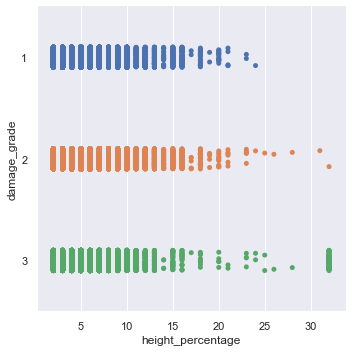

In [13]:
# Observe the relationship between the height of a building and its damage grade.
sb.catplot(x = "height_percentage", y = "damage_grade", data = earthquake_data, orient = "h")

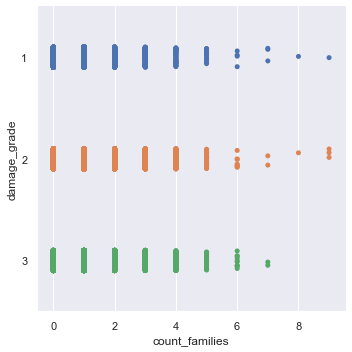

In [14]:
# Observe the relationship between the number of families living in the building and its damage grade.
sb.catplot(x = "count_families", y = "damage_grade", data = earthquake_data, orient = "h")

VISUALIZE EACH OF THE CATEGORICAL VARIABLES OF INTEREST USING THE RAW DATA FROM THE DATASET TO GAUGE HOW THEY AFFECT THE PREDICTOR 'DAMAGE_GRADE'.

t1:  21966 , t2:  122067 , t3:  72724
o1:  602 , o2:  4708 , o3:  3006
n1:  2556 , n2:  21484 , n3:  11488
21966
122067
72724
602
4708
3006
2556
21484
11488


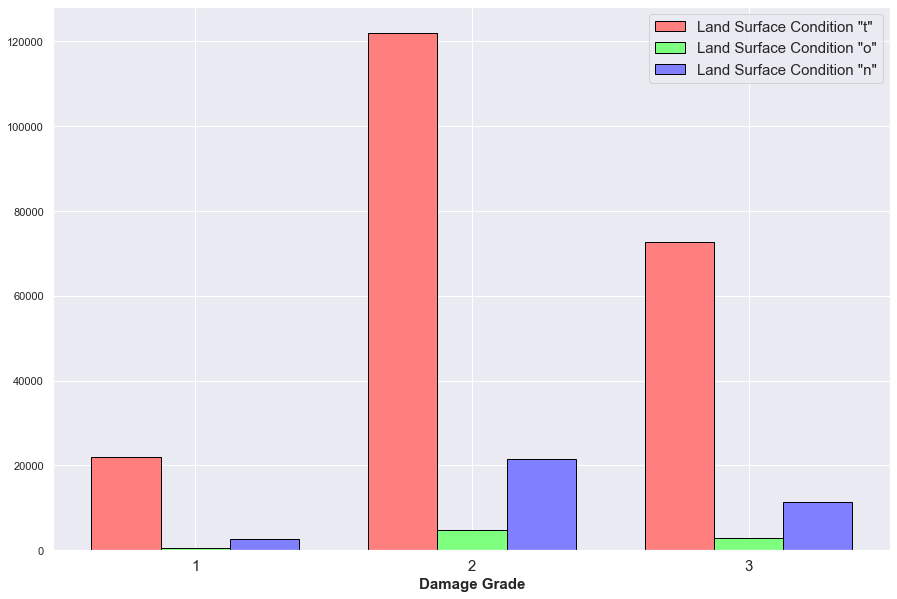

In [15]:
# Obtain the number of occurences for each instance of land surface condition and damage grade.
i, t1, t2, t3, o1, o2, o3, n1, n2, n3 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['land_surface_condition'][i] == 't'):
        if(earthquake_data['damage_grade'][i] == 1):
            t1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             t2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             t3 += 1
    
    if(earthquake_data['land_surface_condition'][i] == 'o'):
        if(earthquake_data['damage_grade'][i] == 1):
            o1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             o2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             o3 += 1
    
    if(earthquake_data['land_surface_condition'][i] == 'n'):
        if(earthquake_data['damage_grade'][i] == 1):
            n1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             n2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             n3 += 1
            
    i += 1

print("t1: ", t1, ", t2: ", t2, ", t3: ", t3)
print("o1: ", o1, ", o2: ", o2, ", o3: ", o3)
print("n1: ", n1, ", n2: ", n2, ", n3: ", n3)

land_surface_condition_list = [t1, t2, t3, o1, o2, o3, n1, n2, n3]

for j in land_surface_condition_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [land_surface_condition_list[0], land_surface_condition_list[1], land_surface_condition_list[2]]
bars2 = [land_surface_condition_list[3], land_surface_condition_list[4], land_surface_condition_list[5]]
bars3 = [land_surface_condition_list[6], land_surface_condition_list[7], land_surface_condition_list[8]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Land Surface Condition "t"')
plt.bar(r2, bars2, color = '#7FFF7F', width = barWidth, edgecolor = 'black', label = 'Land Surface Condition "o"')
plt.bar(r3, bars3, color = '#7F7FFF', width = barWidth, edgecolor = 'black', label = 'Land Surface Condition "n"')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r + 0.25 for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built on land surface condition 't' is likely to result in the greatest extent of damage.
# Buildings built on land surface condition 'o' is likely to result in the least extent of damage.

r1:  10720 , r2:  125515 , r3:  82961
w1:  4353 , w2:  9270 , w3:  1495
i1:  6004 , i2:  4354 , i3:  221
u1:  3689 , u2:  8541 , u3:  2030
h1:  358 , h2:  579 , h3:  511
10720
125515
82961
4353
9270
1495
6004
4354
221
3689
8541
2030
358
579
511


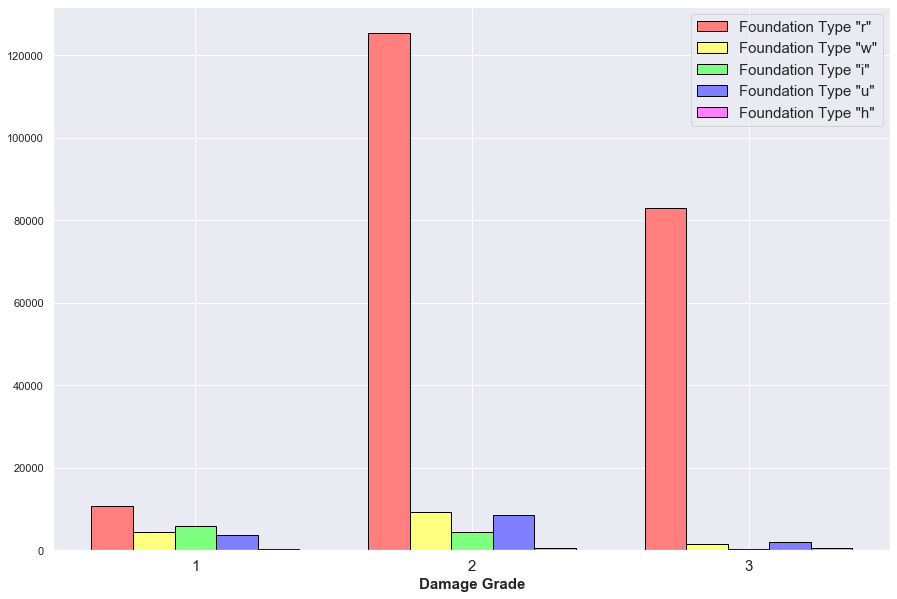

In [16]:
# Obtain the number of occurences for each instance of foundation type and damage grade.
i, r1, r2, r3, w1, w2, w3, i1, i2, i3 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
u1, u2, u3, h1, h2, h3 = 0, 0, 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['foundation_type'][i] == 'r'):
        if(earthquake_data['damage_grade'][i] == 1):
            r1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             r2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             r3 += 1
                
    if(earthquake_data['foundation_type'][i] == 'w'):
        if(earthquake_data['damage_grade'][i] == 1):
            w1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             w2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             w3 += 1
    
    if(earthquake_data['foundation_type'][i] == 'i'):
        if(earthquake_data['damage_grade'][i] == 1):
            i1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             i2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             i3 += 1
                
    if(earthquake_data['foundation_type'][i] == 'u'):
        if(earthquake_data['damage_grade'][i] == 1):
            u1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             u2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             u3 += 1
                
    if(earthquake_data['foundation_type'][i] == 'h'):
        if(earthquake_data['damage_grade'][i] == 1):
            h1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             h2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             h3 += 1
            
    i += 1

print("r1: ", r1, ", r2: ", r2, ", r3: ", r3)
print("w1: ", w1, ", w2: ", w2, ", w3: ", w3)
print("i1: ", i1, ", i2: ", i2, ", i3: ", i3)
print("u1: ", u1, ", u2: ", u2, ", u3: ", u3)
print("h1: ", h1, ", h2: ", h2, ", h3: ", h3)

foundation_type_list = [r1, r2, r3, w1, w2, w3, i1, i2, i3, u1, u2, u3, h1, h2, h3]

for j in foundation_type_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.15

# Set the height of the bars based on the variables.
bars1 = [foundation_type_list[0], foundation_type_list[1], foundation_type_list[2]]
bars2 = [foundation_type_list[3], foundation_type_list[4], foundation_type_list[5]]
bars3 = [foundation_type_list[6], foundation_type_list[7], foundation_type_list[8]]
bars4 = [foundation_type_list[9], foundation_type_list[10], foundation_type_list[11]]
bars5 = [foundation_type_list[12], foundation_type_list[13], foundation_type_list[14]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Foundation Type "r"')
plt.bar(r2, bars2, color = '#FFFF7F', width = barWidth, edgecolor = 'black', label = 'Foundation Type "w"')
plt.bar(r3, bars3, color = '#7FFF7F', width = barWidth, edgecolor = 'black', label = 'Foundation Type "i"')
plt.bar(r4, bars4, color = '#7F7FFF', width = barWidth, edgecolor = 'black', label = 'Foundation Type "u"')
plt.bar(r5, bars5, color = '#FF7FFF', width = barWidth, edgecolor = 'black', label = 'Foundation Type "h"')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r + 0.30 for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with a foundation type of 'r' are likely to result in the greatest extent of damage.
# Buildings with a foundation type of 'h' are likely to result in the least extent of damage.

n1:  13547 , n2:  106447 , n3:  62848
q1:  3926 , q2:  34009 , q3:  23641
x1:  7651 , x2:  7803 , x3:  729
13547
106447
62848
3926
34009
23641
7651
7803
729


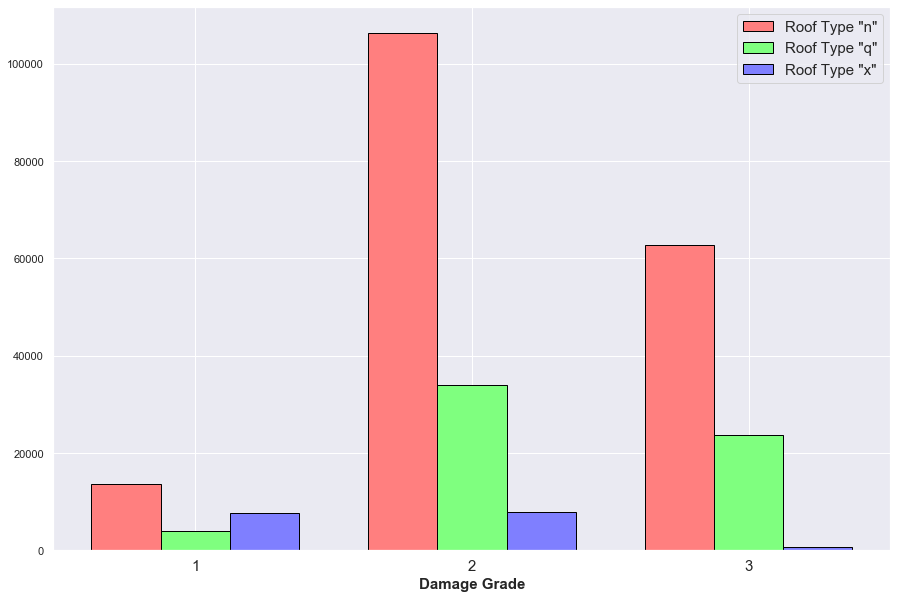

In [17]:
# Obtain the number of occurences for each instance of roof type and damage grade.
i, n1, n2, n3, q1, q2, q3, x1, x2, x3 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['roof_type'][i] == 'n'):
        if(earthquake_data['damage_grade'][i] == 1):
            n1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             n2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             n3 += 1
             
    if(earthquake_data['roof_type'][i] == 'q'):
        if(earthquake_data['damage_grade'][i] == 1):
            q1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             q2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             q3 += 1
             
    if(earthquake_data['roof_type'][i] == 'x'):
        if(earthquake_data['damage_grade'][i] == 1):
            x1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             x2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             x3 += 1
            
    i += 1

print("n1: ", n1, ", n2: ", n2, ", n3: ", n3)
print("q1: ", q1, ", q2: ", q2, ", q3: ", q3)
print("x1: ", x1, ", x2: ", x2, ", x3: ", x3)

roof_type_list = [n1, n2, n3, q1, q2, q3, x1, x2, x3]

for j in roof_type_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [roof_type_list[0], roof_type_list[1], roof_type_list[2]]
bars2 = [roof_type_list[3], roof_type_list[4], roof_type_list[5]]
bars3 = [roof_type_list[6], roof_type_list[7], roof_type_list[8]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Roof Type "n"')
plt.bar(r2, bars2, color = '#7FFF7F', width = barWidth, edgecolor = 'black', label = 'Roof Type "q"')
plt.bar(r3, bars3, color = '#7F7FFF', width = barWidth, edgecolor = 'black', label = 'Roof Type "x"')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r + 0.25 for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with a roof type of 'n' are likely to result in the greatest extent of damage.
# Buildings with a roof type of 'x' are likely to result in the least extent of damage.

f1:  12474 , f2:  119877 , f3:  77268
m1:  90 , m2:  343 , m3:  75
v1:  10309 , v2:  12971 , v3:  1313
x1:  2052 , x2:  14536 , x3:  8289
z1:  199 , z2:  532 , z3:  273
12474
119877
77268
90
343
75
10309
12971
1313
2052
14536
8289
199
532
273


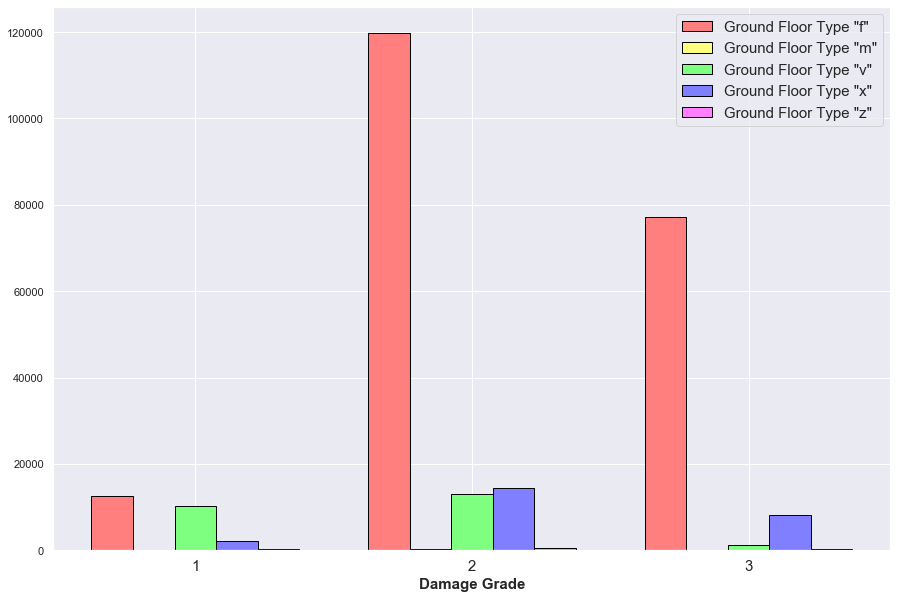

In [18]:
# Obtain the number of occurences for each instance of ground floor type and damage grade.
i, f1, f2, f3, m1, m2, m3, v1, v2, v3 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
x1, x2, x3, z1, z2, z3 = 0, 0, 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['ground_floor_type'][i] == 'f'):
        if(earthquake_data['damage_grade'][i] == 1):
            f1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             f2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             f3 += 1
             
    if(earthquake_data['ground_floor_type'][i] == 'm'):
        if(earthquake_data['damage_grade'][i] == 1):
            m1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             m2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             m3 += 1
             
    if(earthquake_data['ground_floor_type'][i] == 'v'):
        if(earthquake_data['damage_grade'][i] == 1):
            v1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             v2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             v3 += 1
                
    if(earthquake_data['ground_floor_type'][i] == 'x'):
        if(earthquake_data['damage_grade'][i] == 1):
            x1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             x2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             x3 += 1
    
    if(earthquake_data['ground_floor_type'][i] == 'z'):
        if(earthquake_data['damage_grade'][i] == 1):
            z1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             z2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             z3 += 1
            
    i += 1

print("f1: ", f1, ", f2: ", f2, ", f3: ", f3)
print("m1: ", m1, ", m2: ", m2, ", m3: ", m3)
print("v1: ", v1, ", v2: ", v2, ", v3: ", v3)
print("x1: ", x1, ", x2: ", x2, ", x3: ", x3)
print("z1: ", z1, ", z2: ", z2, ", z3: ", z3)

ground_floor_type_list = [f1, f2, f3, m1, m2, m3, v1, v2, v3, x1, x2, x3, z1, z2, z3]

for j in ground_floor_type_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.15

# Set the height of the bars based on the variables.
bars1 = [ground_floor_type_list[0], ground_floor_type_list[1], ground_floor_type_list[2]]
bars2 = [ground_floor_type_list[3], ground_floor_type_list[4], ground_floor_type_list[5]]
bars3 = [ground_floor_type_list[6], ground_floor_type_list[7], ground_floor_type_list[8]]
bars4 = [ground_floor_type_list[9], ground_floor_type_list[10], ground_floor_type_list[11]]
bars5 = [ground_floor_type_list[12], ground_floor_type_list[13], ground_floor_type_list[14]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Ground Floor Type "f"')
plt.bar(r2, bars2, color = '#FFFF7F', width = barWidth, edgecolor = 'black', label = 'Ground Floor Type "m"')
plt.bar(r3, bars3, color = '#7FFF7F', width = barWidth, edgecolor = 'black', label = 'Ground Floor Type "v"')
plt.bar(r4, bars4, color = '#7F7FFF', width = barWidth, edgecolor = 'black', label = 'Ground Floor Type "x"')
plt.bar(r5, bars5, color = '#FF7FFF', width = barWidth, edgecolor = 'black', label = 'Ground Floor Type "z"')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r + 0.30 for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with a ground floor type of 'f' are likely to result in the greatest extent of damage.
# Buildings with a ground floor type of 'm' and 'z' are likely to result in the least extent of damage.

q1:  7387 , q2:  98320 , q3:  59575
j1:  8886 , j2:  20362 , j3:  10595
s1:  5423 , s2:  5904 , s3:  701
x1:  3428 , x2:  23673 , x3:  16347
7387
98320
59575
8886
20362
10595
5423
5904
701
3428
23673
16347


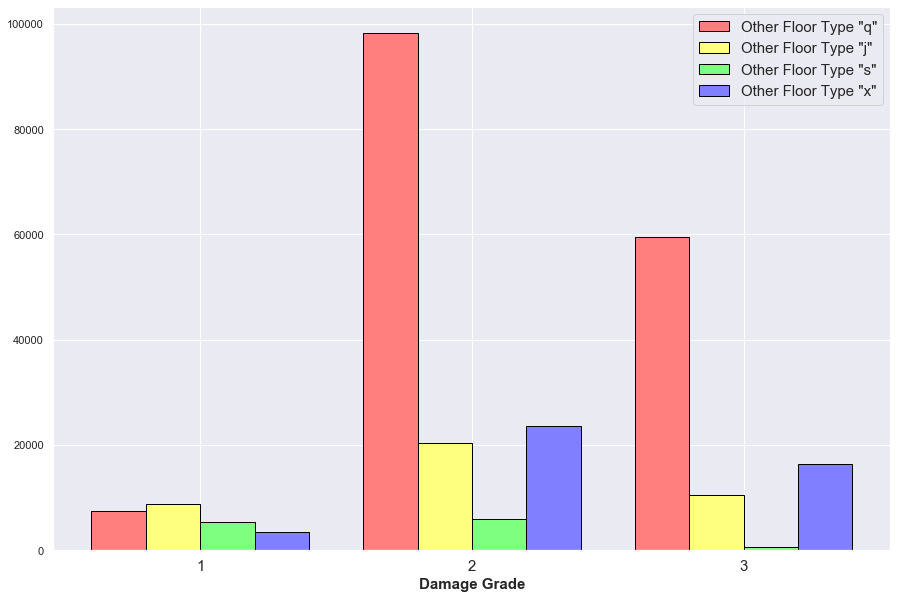

In [19]:
# Obtain the number of occurences for each instance of other floor type and damage grade.
i, q1, q2, q3, j1, j2, j3 = 0, 0, 0, 0, 0, 0, 0
s1, s2, s3, x1, x2, x3 = 0, 0, 0, 0, 0, 0

while(i <= 260600):
             
    if(earthquake_data['other_floor_type'][i] == 'q'):
        if(earthquake_data['damage_grade'][i] == 1):
            q1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             q2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             q3 += 1
                
    if(earthquake_data['other_floor_type'][i] == 'j'):
        if(earthquake_data['damage_grade'][i] == 1):
            j1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             j2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             j3 += 1
             
    if(earthquake_data['other_floor_type'][i] == 's'):
        if(earthquake_data['damage_grade'][i] == 1):
            s1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             s2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             s3 += 1
                
    if(earthquake_data['other_floor_type'][i] == 'x'):
        if(earthquake_data['damage_grade'][i] == 1):
            x1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             x2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             x3 += 1
            
    i += 1

print("q1: ", q1, ", q2: ", q2, ", q3: ", q3)
print("j1: ", j1, ", j2: ", j2, ", j3: ", j3)
print("s1: ", s1, ", s2: ", s2, ", s3: ", s3)
print("x1: ", x1, ", x2: ", x2, ", x3: ", x3)

other_floor_type_list = [q1, q2, q3, j1, j2, j3, s1, s2, s3, x1, x2, x3]

for j in other_floor_type_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.2

# Set the height of the bars based on the variables.
bars1 = [other_floor_type_list[0], other_floor_type_list[1], other_floor_type_list[2]]
bars2 = [other_floor_type_list[3], other_floor_type_list[4], other_floor_type_list[5]]
bars3 = [other_floor_type_list[6], other_floor_type_list[7], other_floor_type_list[8]]
bars4 = [other_floor_type_list[9], other_floor_type_list[10], other_floor_type_list[11]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Other Floor Type "q"')
plt.bar(r2, bars2, color = '#FFFF7F', width = barWidth, edgecolor = 'black', label = 'Other Floor Type "j"')
plt.bar(r3, bars3, color = '#7FFF7F', width = barWidth, edgecolor = 'black', label = 'Other Floor Type "s"')
plt.bar(r4, bars4, color = '#7F7FFF', width = barWidth, edgecolor = 'black', label = 'Other Floor Type "x"')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r + 0.3 for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with an other floor type 'q' of are likely to result in the greatest extent of damage.
# Buildings with an other floor type 's' of are likely to result in the least extent of damage.

s1:  19867 , s2:  116051 , s3:  66172
o1:  120 , o2:  1609 , o3:  604
j1:  1675 , j2:  7899 , j3:  3708
t1:  3462 , t2:  22700 , t3:  16734
19867
116051
66172
120
1609
604
1675
7899
3708
3462
22700
16734


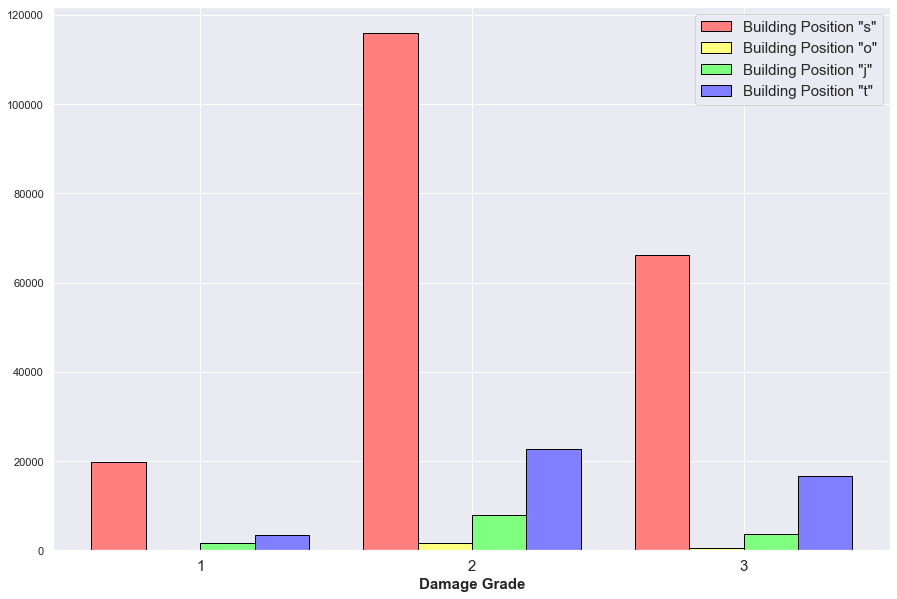

In [20]:
# Obtain the number of occurences for each instance of position type and damage grade.
i, s1, s2, s3, o1, o2, o3 = 0, 0, 0, 0, 0, 0, 0
j1, j2, j3, t1, t2, t3 = 0, 0, 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['position'][i] == 's'):
        if(earthquake_data['damage_grade'][i] == 1):
            s1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             s2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             s3 += 1
                          
    if(earthquake_data['position'][i] == 'o'):
        if(earthquake_data['damage_grade'][i] == 1):
            o1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             o2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             o3 += 1
             
    if(earthquake_data['position'][i] == 'j'):
        if(earthquake_data['damage_grade'][i] == 1):
            j1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             j2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             j3 += 1
                
    if(earthquake_data['position'][i] == 't'):
        if(earthquake_data['damage_grade'][i] == 1):
            t1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             t2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             t3 += 1
            
    i += 1

print("s1: ", s1, ", s2: ", s2, ", s3: ", s3)
print("o1: ", o1, ", o2: ", o2, ", o3: ", o3)
print("j1: ", j1, ", j2: ", j2, ", j3: ", j3)
print("t1: ", t1, ", t2: ", t2, ", t3: ", t3)

position_type_list = [s1, s2, s3, o1, o2, o3, j1, j2, j3, t1, t2, t3]

for j in position_type_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.2

# Set the height of the bars based on the variables.
bars1 = [position_type_list[0], position_type_list[1], position_type_list[2]]
bars2 = [position_type_list[3], position_type_list[4], position_type_list[5]]
bars3 = [position_type_list[6], position_type_list[7], position_type_list[8]]
bars4 = [position_type_list[9], position_type_list[10], position_type_list[11]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Building Position "s"')
plt.bar(r2, bars2, color = '#FFFF7F', width = barWidth, edgecolor = 'black', label = 'Building Position "o"')
plt.bar(r3, bars3, color = '#7FFF7F', width = barWidth, edgecolor = 'black', label = 'Building Position "j"')
plt.bar(r4, bars4, color = '#7F7FFF', width = barWidth, edgecolor = 'black', label = 'Building Position "t"')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r + 0.3 for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with a position of 's' of are likely to result in the greatest extent of damage.
# Buildings with a position of 'o' and 'j' of are likely to result in the least extent of damage.

a1:  66 , a2:  157 , a3:  29
c1:  86 , c2:  206 , c3:  33
d1:  23310 , d2:  142523 , d3:  84239
f1:  0 , f2:  16 , f3:  6
m1:  8 , m2:  34 , m3:  4
n1:  6 , n2:  20 , n3:  12
o1:  40 , o2:  96 , o3:  23
q1:  781 , q2:  2585 , q3:  2326
s1:  53 , s2:  223 , s3:  70
u1:  774 , u2:  2399 , u3:  476
66
157
29
86
206
33
23310
142523
84239
0
16
6
8
34
4
6
20
12
40
96
23
781
2585
2326
53
223
70
774
2399
476


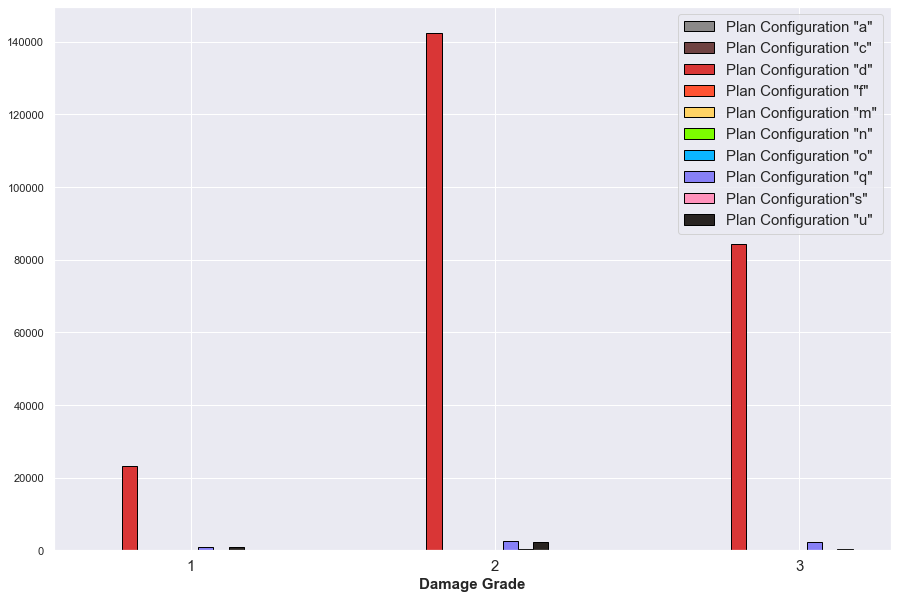

In [6]:
# Obtain the number of occurences for each instance of plan configuration type and damage grade.
i, a1, a2, a3, c1, c2, c3, d1, d2, d3 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0
f1, f2, f3, m1, m2, m3, n1, n2, n3 = 0, 0, 0, 0, 0, 0, 0, 0, 0
o1, o2, o3, q1, q2, q3, s1, s2, s3, u1, u2, u3 = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['plan_configuration'][i] == 'a'):
        if(earthquake_data['damage_grade'][i] == 1):
            a1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             a2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             a3 += 1
             
    if(earthquake_data['plan_configuration'][i] == 'c'):
        if(earthquake_data['damage_grade'][i] == 1):
            c1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             c2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             c3 += 1
             
    if(earthquake_data['plan_configuration'][i] == 'd'):
        if(earthquake_data['damage_grade'][i] == 1):
            d1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             d2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             d3 += 1
                
    if(earthquake_data['plan_configuration'][i] == 'f'):
        if(earthquake_data['damage_grade'][i] == 1):
            f1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             f2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             f3 += 1
    
    if(earthquake_data['plan_configuration'][i] == 'm'):
        if(earthquake_data['damage_grade'][i] == 1):
            m1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             m2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             m3 += 1
                
    if(earthquake_data['plan_configuration'][i] == 'n'):
        if(earthquake_data['damage_grade'][i] == 1):
            n1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             n2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             n3 += 1
                
    if(earthquake_data['plan_configuration'][i] == 'o'):
        if(earthquake_data['damage_grade'][i] == 1):
            o1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             o2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             o3 += 1
            
    if(earthquake_data['plan_configuration'][i] == 'q'):
        if(earthquake_data['damage_grade'][i] == 1):
            q1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             q2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             q3 += 1
                
    if(earthquake_data['plan_configuration'][i] == 's'):
        if(earthquake_data['damage_grade'][i] == 1):
            s1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             s2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             s3 += 1
              
    if(earthquake_data['plan_configuration'][i] == 'u'):
        if(earthquake_data['damage_grade'][i] == 1):
            u1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             u2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             u3 += 1
            
    i += 1

print("a1: ", a1, ", a2: ", a2, ", a3: ", a3)
print("c1: ", c1, ", c2: ", c2, ", c3: ", c3)
print("d1: ", d1, ", d2: ", d2, ", d3: ", d3)
print("f1: ", f1, ", f2: ", f2, ", f3: ", f3)
print("m1: ", m1, ", m2: ", m2, ", m3: ", m3)
print("n1: ", n1, ", n2: ", n2, ", n3: ", n3)
print("o1: ", o1, ", o2: ", o2, ", o3: ", o3)
print("q1: ", q1, ", q2: ", q2, ", q3: ", q3)
print("s1: ", s1, ", s2: ", s2, ", s3: ", s3)
print("u1: ", u1, ", u2: ", u2, ", u3: ", u3)

plan_configuration_list = [a1, a2, a3, c1, c2, c3, d1, d2, d3, f1, f2, f3, m1, m2, m3,
                         n1, n2, n3, o1, o2, o3, q1, q2, q3, s1, s2, s3, u1, u2, u3]

for j in plan_configuration_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.05

# Set the height of the bars based on the variables.
bars1 = [plan_configuration_list[0], plan_configuration_list[1], plan_configuration_list[2]]
bars2 = [plan_configuration_list[3], plan_configuration_list[4], plan_configuration_list[5]]
bars3 = [plan_configuration_list[6], plan_configuration_list[7], plan_configuration_list[8]]
bars4 = [plan_configuration_list[9], plan_configuration_list[10], plan_configuration_list[11]]
bars5 = [plan_configuration_list[12], plan_configuration_list[13], plan_configuration_list[14]]
bars6 = [plan_configuration_list[15], plan_configuration_list[16], plan_configuration_list[17]]
bars7 = [plan_configuration_list[18], plan_configuration_list[19], plan_configuration_list[20]]
bars8 = [plan_configuration_list[21], plan_configuration_list[22], plan_configuration_list[23]]
bars9 = [plan_configuration_list[24], plan_configuration_list[25], plan_configuration_list[26]]
bars10 = [plan_configuration_list[27], plan_configuration_list[28], plan_configuration_list[29]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]
r6 = [x + barWidth for x in r5]
r7 = [x + barWidth for x in r6]
r8 = [x + barWidth for x in r7]
r9 = [x + barWidth for x in r8]
r10 = [x + barWidth for x in r9]

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#8B8989', width = barWidth, edgecolor = 'black', label = 'Plan Configuration "a"')
plt.bar(r2, bars2, color = '#6F4242', width = barWidth, edgecolor = 'black', label = 'Plan Configuration "c"')
plt.bar(r3, bars3, color = '#D93636', width = barWidth, edgecolor = 'black', label = 'Plan Configuration "d"')
plt.bar(r4, bars4, color = '#FF5333', width = barWidth, edgecolor = 'black', label = 'Plan Configuration "f"')
plt.bar(r5, bars5, color = '#FFD365', width = barWidth, edgecolor = 'black', label = 'Plan Configuration "m"')
plt.bar(r6, bars6, color = '#7CFC00', width = barWidth, edgecolor = 'black', label = 'Plan Configuration "n"')
plt.bar(r7, bars7, color = '#0BB5FF', width = barWidth, edgecolor = 'black', label = 'Plan Configuration "o"')
plt.bar(r8, bars8, color = '#8780F6', width = barWidth, edgecolor = 'black', label = 'Plan Configuration "q"')
plt.bar(r9, bars9, color = '#FF92BB', width = barWidth, edgecolor = 'black', label = 'Plan Configuration"s"')
plt.bar(r10, bars10, color = '#292421', width = barWidth, edgecolor = 'black', label = 'Plan Configuration "u"')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r + 0.30 for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with a plan configuration type 'd' of are likely to result in the greatest extent of damage.
# Buildings with a plan configuration type of any other than 'd' are likely to result in the least extent of damage.

v1:  23270 , v2:  143154 , v3:  84515
r1:  213 , r2:  727 , r3:  533
a1:  1511 , a2:  3074 , a3:  927
w1:  130 , w2:  1304 , w3:  1243
23270
143154
84515
213
727
533
1511
3074
927
130
1304
1243


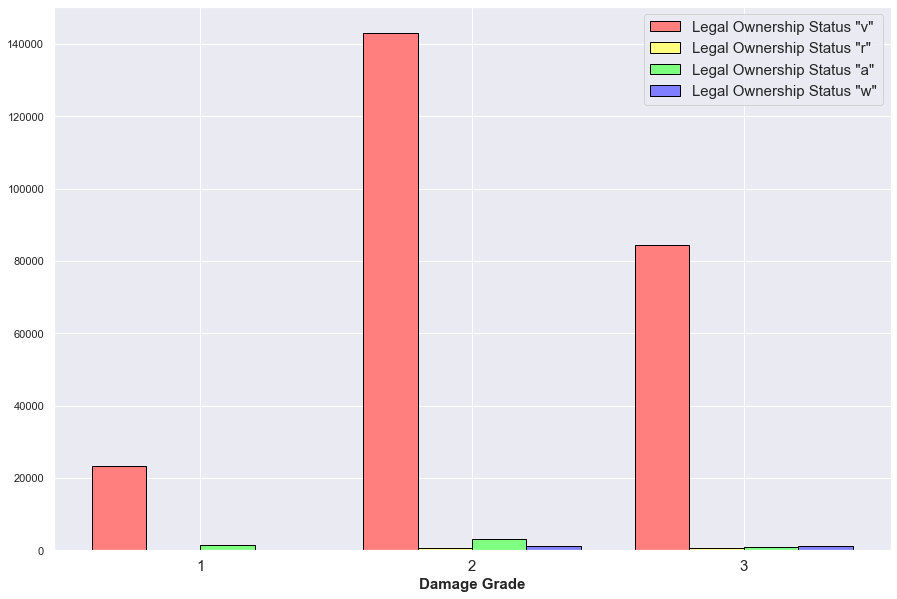

In [22]:
# Obtain the number of occurences for each instance of legal ownership status and damage grade.
i, a1, a2, a3, r1, r2, r3 = 0, 0, 0, 0, 0, 0, 0
v1, v2, v3, w1, w2, w3 = 0, 0, 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['legal_ownership_status'][i] == 'a'):
        if(earthquake_data['damage_grade'][i] == 1):
            a1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             a2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             a3 += 1
                          
    if(earthquake_data['legal_ownership_status'][i] == 'r'):
        if(earthquake_data['damage_grade'][i] == 1):
            r1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             r2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             r3 += 1
             
    if(earthquake_data['legal_ownership_status'][i] == 'v'):
        if(earthquake_data['damage_grade'][i] == 1):
            v1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             v2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             v3 += 1
                
    if(earthquake_data['legal_ownership_status'][i] == 'w'):
        if(earthquake_data['damage_grade'][i] == 1):
            w1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
             w2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
             w3 += 1
            
    i += 1

print("v1: ", v1, ", v2: ", v2, ", v3: ", v3)
print("r1: ", r1, ", r2: ", r2, ", r3: ", r3)
print("a1: ", a1, ", a2: ", a2, ", a3: ", a3)
print("w1: ", w1, ", w2: ", w2, ", w3: ", w3)

legal_ownership_status_list = [v1, v2, v3, r1, r2, r3, a1, a2, a3, w1, w2, w3]

for j in legal_ownership_status_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.2

# Set the height of the bars based on the variables.
bars1 = [legal_ownership_status_list[0], legal_ownership_status_list[1], legal_ownership_status_list[2]]
bars2 = [legal_ownership_status_list[3], legal_ownership_status_list[4], legal_ownership_status_list[5]]
bars3 = [legal_ownership_status_list[6], legal_ownership_status_list[7], legal_ownership_status_list[8]]
bars4 = [legal_ownership_status_list[9], legal_ownership_status_list[10], legal_ownership_status_list[11]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Legal Ownership Status "v"')
plt.bar(r2, bars2, color = '#FFFF7F', width = barWidth, edgecolor = 'black', label = 'Legal Ownership Status "r"')
plt.bar(r3, bars3, color = '#7FFF7F', width = barWidth, edgecolor = 'black', label = 'Legal Ownership Status "a"')
plt.bar(r4, bars4, color = '#7F7FFF', width = barWidth, edgecolor = 'black', label = 'Legal Ownership Status "w"')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r + 0.3 for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with a legal ownership status of 'v' of are likely to result in the greatest extent of damage.
# Buildings with a legal ownership status of 'r' and 'w' of are likely to result in the least extent of damage.

VISUALIZE EACH OF THE BOOLEAN SUPERSTRUCTURE VARIABLES OF INTEREST USING THE RAW DATA FROM THE DATASET TO GAUGE HOW THEY AFFECT THE PREDICTOR 'DAMAGE_GRADE'.

Y1:  594 , Y2:  13902 , Y3:  8605
594
13902
8605


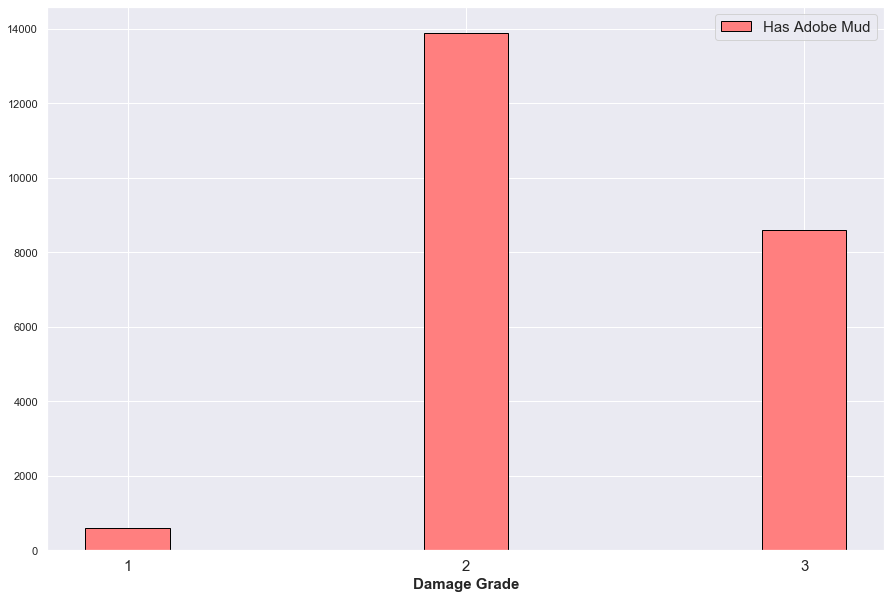

In [23]:
# Obtain the number of occurences for each instance of buildings built with adobe mud and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_adobe_mud'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

adobe_mud_list = [Y1, Y2, Y3]

for j in adobe_mud_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [adobe_mud_list[0], adobe_mud_list[1], adobe_mud_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Adobe Mud')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with adobe mud are likely to result in the a greater extent of damage.

Y1:  8760 , Y2:  113947 , Y3:  75854
8760
113947
75854


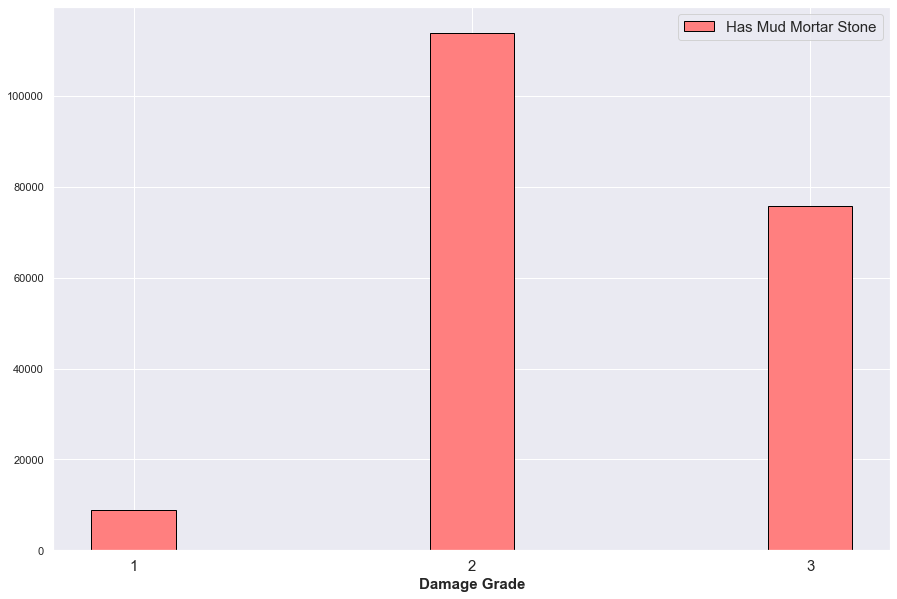

In [24]:
# Obtain the number of occurences for each instance of buildings built with mud mortar stone and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_mud_mortar_stone'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

mud_mortar_stone_list = [Y1, Y2, Y3]

for j in mud_mortar_stone_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [mud_mortar_stone_list[0], mud_mortar_stone_list[1], mud_mortar_stone_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Mud Mortar Stone')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with mud mortar stone are likely to result in a greater extent of damage.

Y1:  182 , Y2:  4534 , Y3:  4231
182
4534
4231


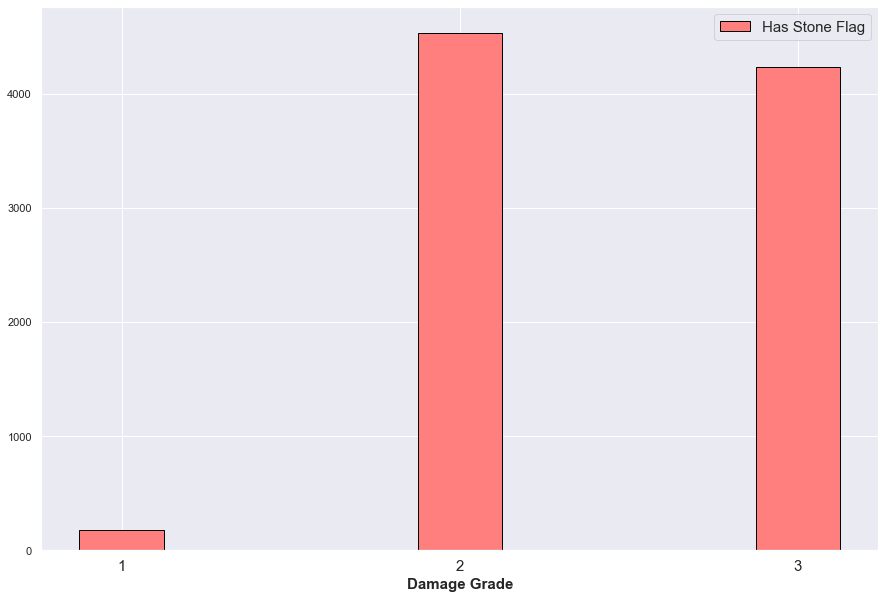

In [25]:
# Obtain the number of occurences for each instance of buildings built with stone flag and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_stone_flag'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

stone_flag_list = [Y1, Y2, Y3]

for j in stone_flag_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [stone_flag_list[0], stone_flag_list[1], stone_flag_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Stone Flag')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with stone flag are likely to result in a greater extent of damage.

Y1:  829 , Y2:  3248 , Y3:  675
829
3248
675


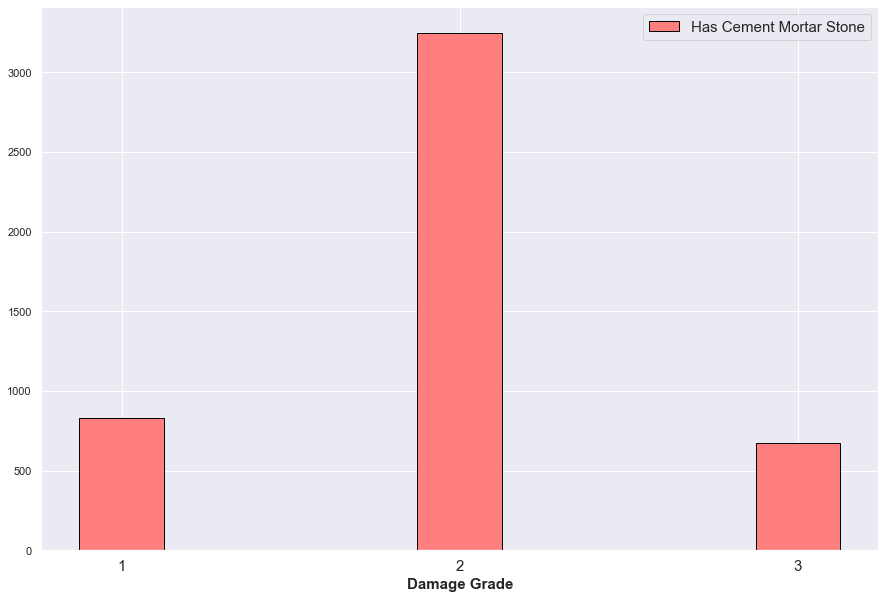

In [26]:
# Obtain the number of occurences for each instance of buildings built with cement mortar stone and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_cement_mortar_stone'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

cement_mortar_stone_list = [Y1, Y2, Y3]

for j in cement_mortar_stone_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [cement_mortar_stone_list[0], cement_mortar_stone_list[1], cement_mortar_stone_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Cement Mortar Stone')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with cement mortar stone are likely to result in a lesser extent of damage.

Y1:  623 , Y2:  11698 , Y3:  5440
623
11698
5440


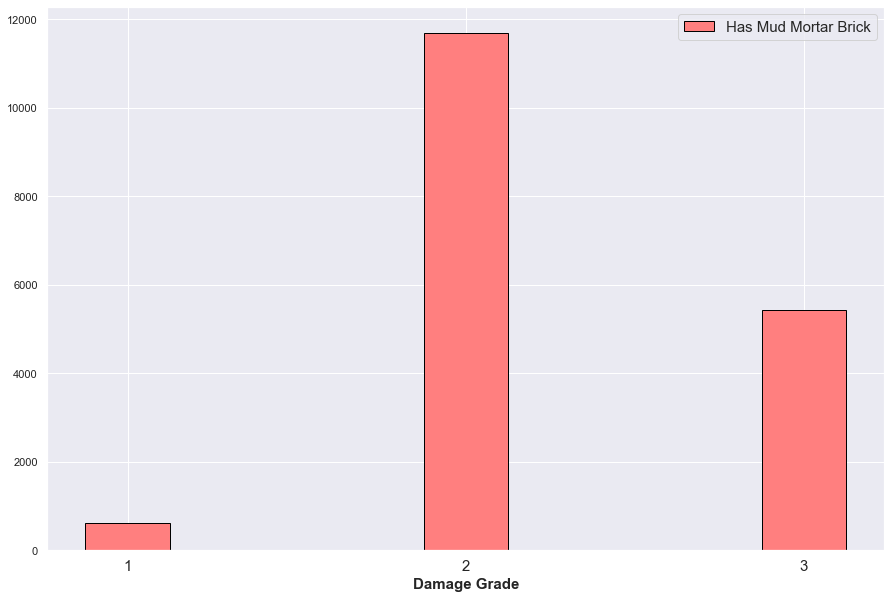

In [27]:
# Obtain the number of occurences for each instance of buildings built with mud mortar brick and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_mud_mortar_brick'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

mud_mortar_brick_list = [Y1, Y2, Y3]

for j in mud_mortar_brick_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [mud_mortar_brick_list[0], mud_mortar_brick_list[1], mud_mortar_brick_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Mud Mortar Brick')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with mud mortar brick are likely to result in a greater extent of damage.

Y1:  7105 , Y2:  11421 , Y3:  1089
7105
11421
1089


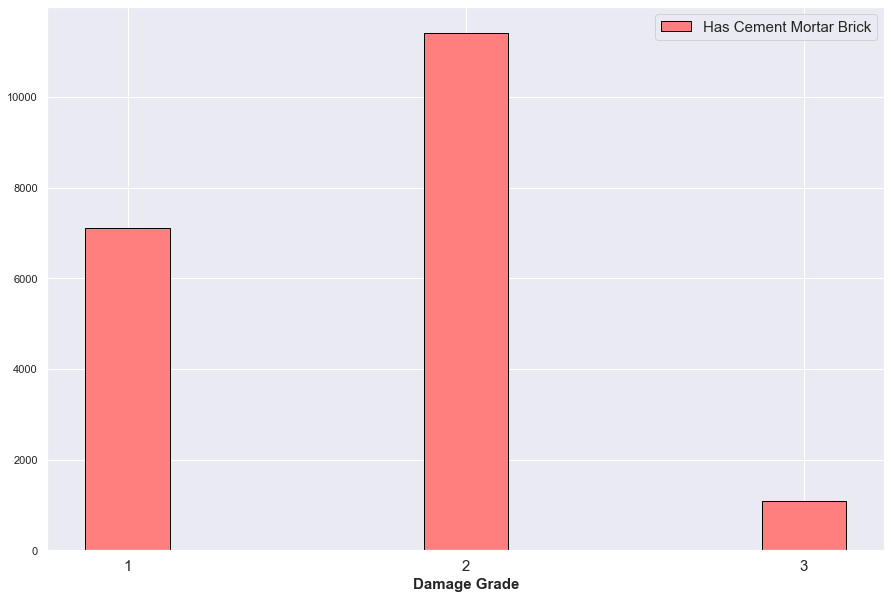

In [28]:
# Obtain the number of occurences for each instance of buildings built with cement mortar brick and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_cement_mortar_brick'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

cement_mortar_brick_list = [Y1, Y2, Y3]

for j in cement_mortar_brick_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [cement_mortar_brick_list[0], cement_mortar_brick_list[1], cement_mortar_brick_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Cement Mortar Brick')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with cement mortar brick are likely to result in a lesser extent of damage.

Y1:  7642 , Y2:  40187 , Y3:  18621
7642
40187
18621


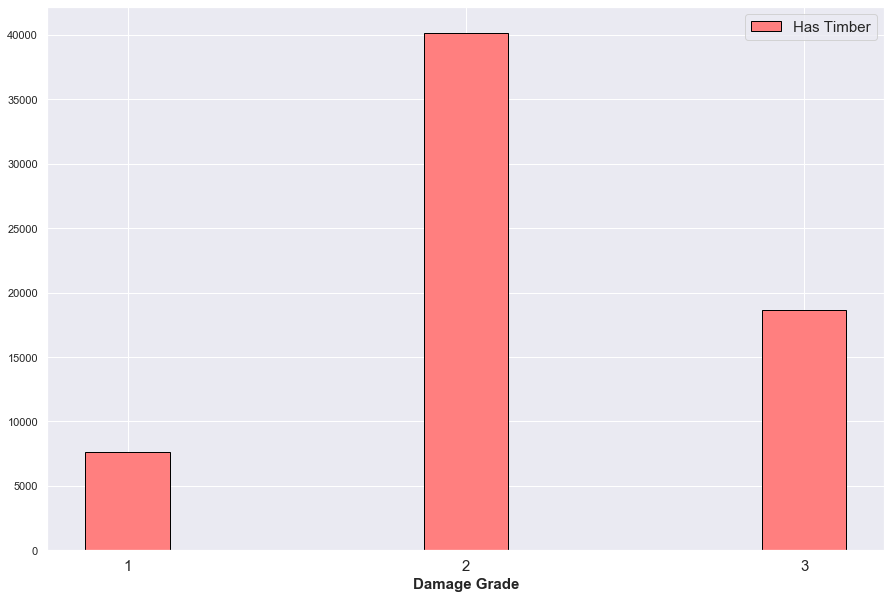

In [29]:
# Obtain the number of occurences for each instance of buildings built with timber and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_timber'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
        
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

timber_list = [Y1, Y2, Y3]

for j in timber_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [timber_list[0], timber_list[1], timber_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Timber')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with timber are likely to result in a greater extent of damage.

Y1:  2839 , Y2:  14001 , Y3:  5314
2839
14001
5314


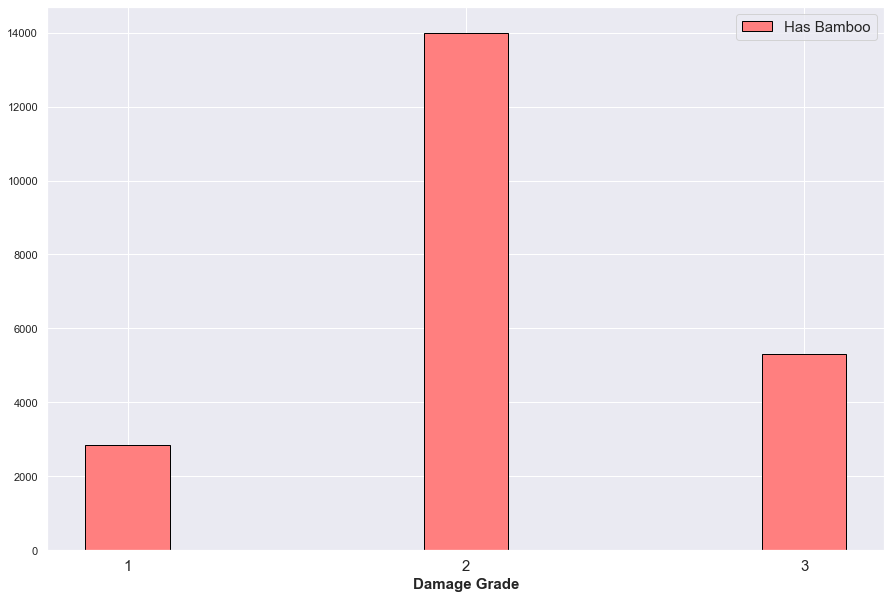

In [30]:
# Obtain the number of occurences for each instance of buildings built with bamboo and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_bamboo'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

bamboo_list = [Y1, Y2, Y3]

for j in bamboo_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [bamboo_list[0], bamboo_list[1], bamboo_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Bamboo')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with bamboo are likely to result in a greater extent of damage.

Y1:  3857 , Y2:  5832 , Y3:  1410
3857
5832
1410


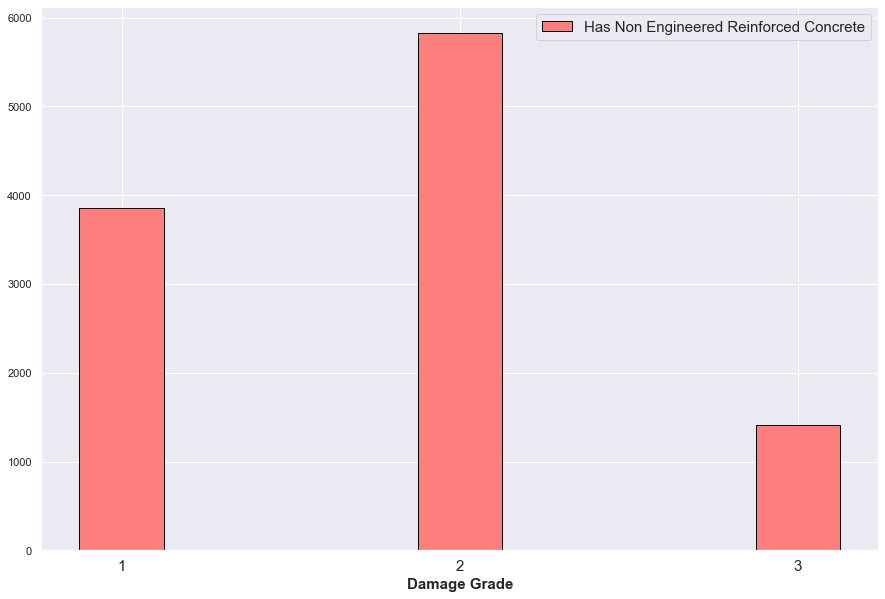

In [31]:
# Obtain the number of occurences for each instance of buildings built with non engineered reinforced concrete and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_rc_non_engineered'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

rc_non_engineered_list = [Y1, Y2, Y3]

for j in rc_non_engineered_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [rc_non_engineered_list[0], rc_non_engineered_list[1], rc_non_engineered_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Non Engineered Reinforced Concrete')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with non engineered reinforced concrete are likely to result in a lesser extent of damage.

Y1:  2656 , Y2:  1402 , Y3:  75
2656
1402
75


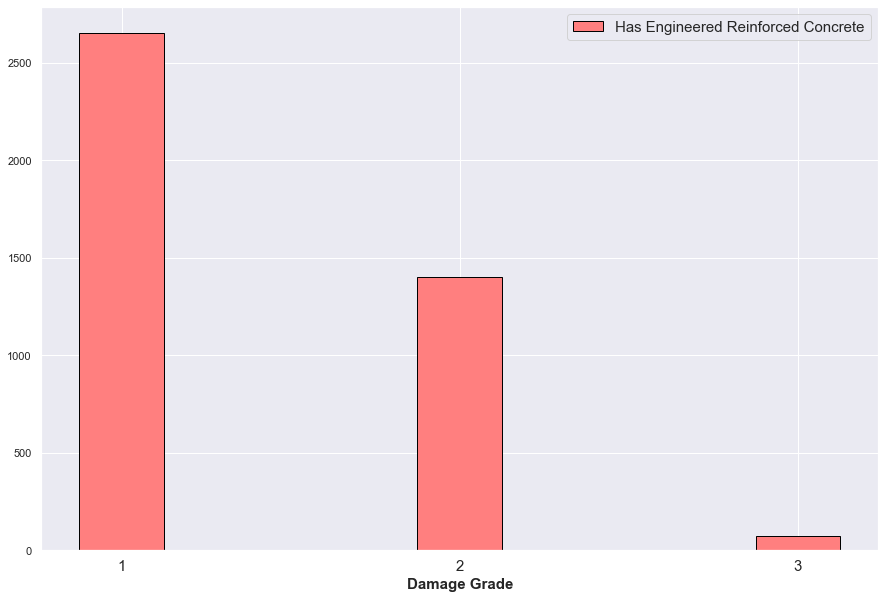

In [32]:
# Obtain the number of occurences for each instance of buildings built with engineered reinforced concrete and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_rc_engineered'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

rc_engineered_list = [Y1, Y2, Y3]

for j in rc_engineered_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [rc_engineered_list[0], rc_engineered_list[1], rc_engineered_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Engineered Reinforced Concrete')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with engineered reinforced concrete are likely to result in a lesser extent of damage.

Y1:  656 , Y2:  2248 , Y3:  1001
656
2248
1001


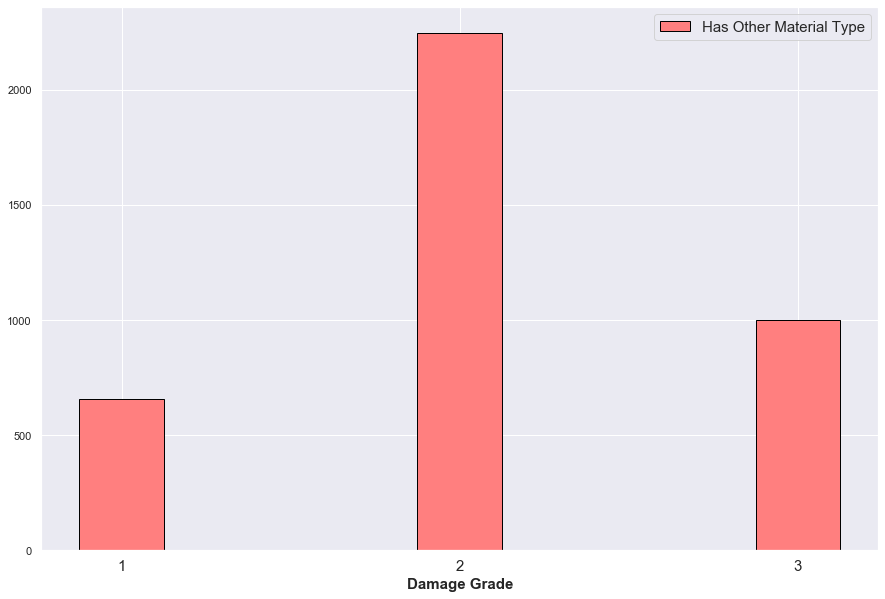

In [33]:
# Obtain the number of occurences for each instance of buildings built with any other material type and damage grade.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_superstructure_other'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

other_material_list = [Y1, Y2, Y3]

for j in other_material_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [other_material_list[0], other_material_list[1], other_material_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Other Material Type')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings built with other material types are likely to result in a greater extent of damage.

VISUALIZE EACH OF THE BOOLEAN HAS SECONDARY USE VARIABLES OF INTEREST USING THE RAW DATA FROM THE DATASET TO GAUGE HOW THEY AFFECT THE PREDICTOR 'DAMAGE_GRADE'.

Y1:  4248 , Y2:  17715 , Y3:  7193
4248
17715
7193


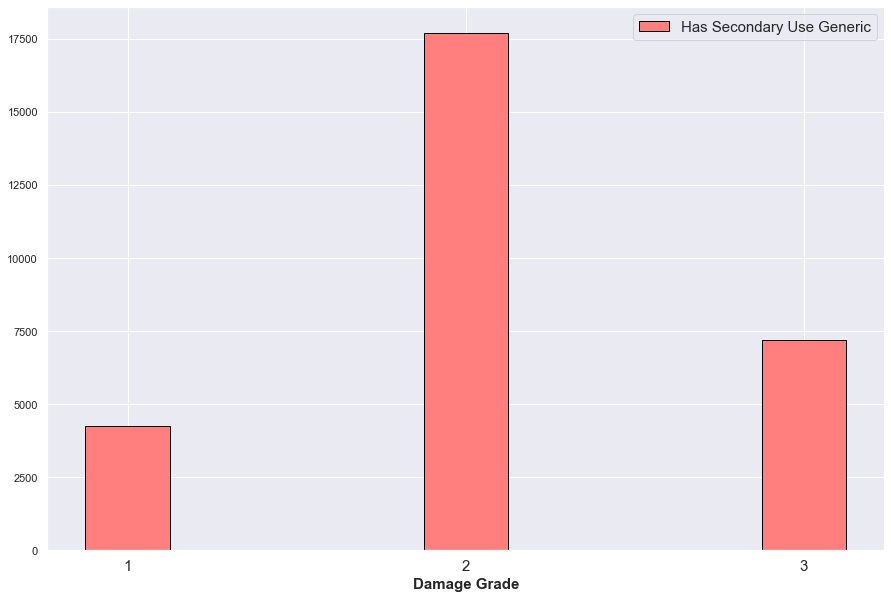

In [34]:
# Obtain the number of occurences for each instance of buildings with generic secondary uses.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_list = [Y1, Y2, Y3]

for j in has_secondary_use_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_list[0], has_secondary_use_list[1], has_secondary_use_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use Generic')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with generic secondary use are likely to result in a greater extent of damage.

Y1:  829 , Y2:  10679 , Y3:  5269
829
10679
5269


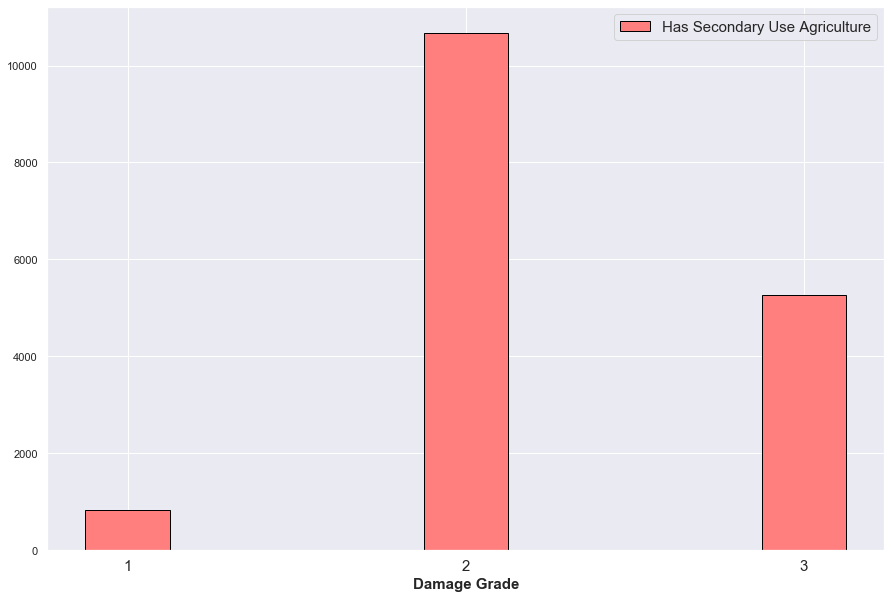

In [35]:
# Obtain the number of occurences for each instance of buildings with generic secondary agriculture use.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use_agriculture'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_agriculture_list = [Y1, Y2, Y3]

for j in has_secondary_use_agriculture_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_agriculture_list[0], has_secondary_use_agriculture_list[1], has_secondary_use_agriculture_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use Agriculture')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with secondary use of agriculture are likely to result in a greater extent of damage.

Y1:  2216 , Y2:  5058 , Y3:  1489
2216
5058
1489


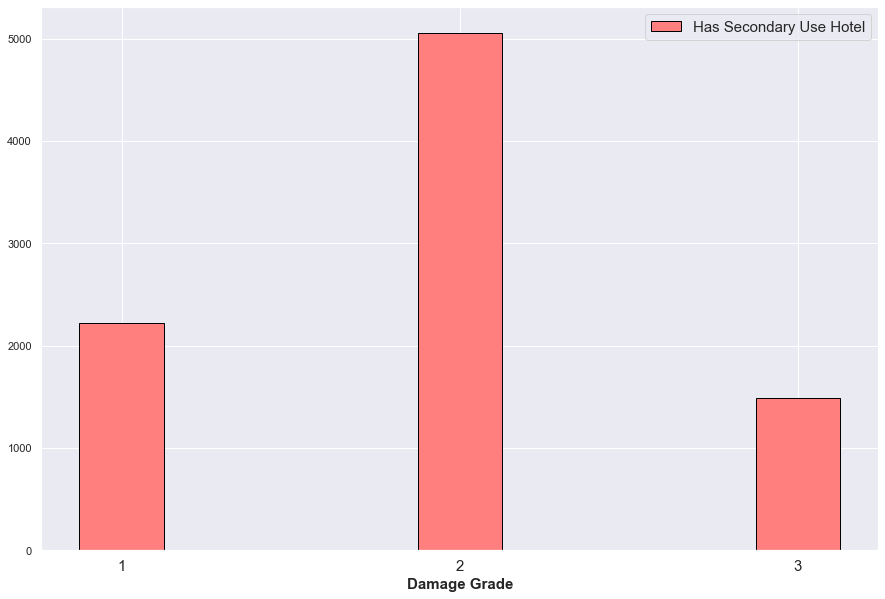

In [36]:
# Obtain the number of occurences for each instance of buildings with generic secondary hotel use.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use_hotel'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_hotel_list = [Y1, Y2, Y3]

for j in has_secondary_use_hotel_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_hotel_list[0], has_secondary_use_hotel_list[1], has_secondary_use_hotel_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use Hotel')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with secondary use of hotel are likely to result in a lesser extent of damage.

Y1:  877 , Y2:  1051 , Y3:  183
877
1051
183


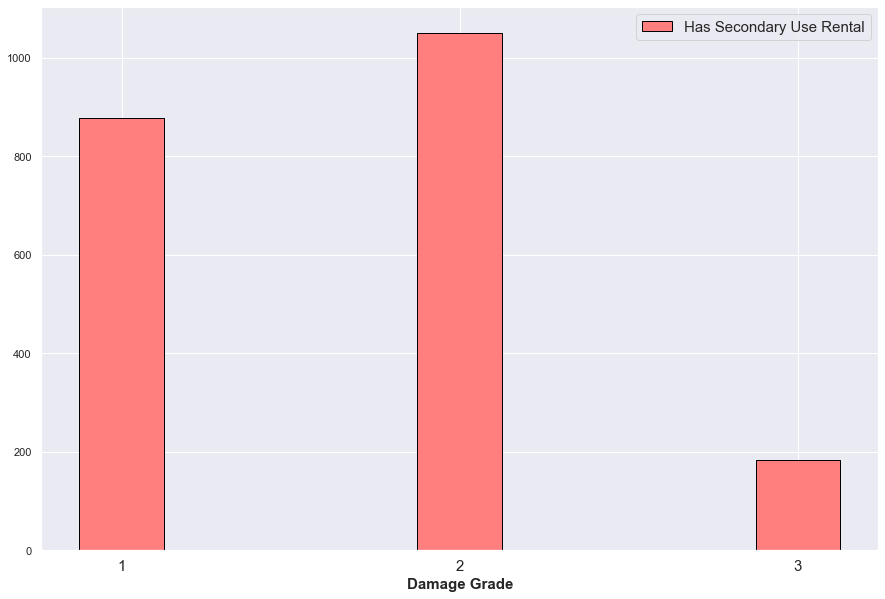

In [37]:
# Obtain the number of occurences for each instance of buildings with generic secondary rental use.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use_rental'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_rental_list = [Y1, Y2, Y3]

for j in has_secondary_use_rental_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_rental_list[0], has_secondary_use_rental_list[1], has_secondary_use_rental_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use Rental')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with secondary use of rental are likely to result in a lesser extent of damage.

Y1:  99 , Y2:  129 , Y3:  17
99
129
17


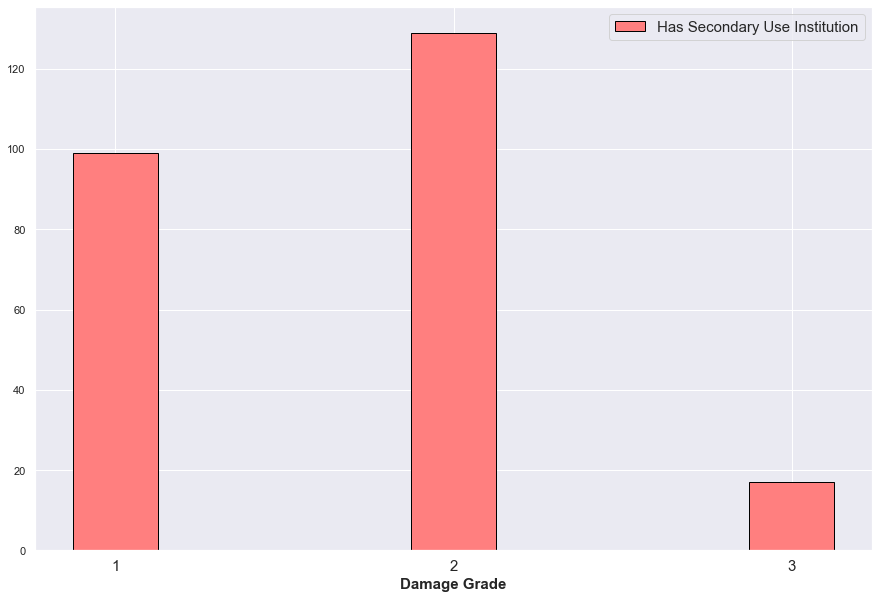

In [38]:
# Obtain the number of occurences for each instance of buildings with generic secondary institution use.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use_institution'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_institution_list = [Y1, Y2, Y3]

for j in has_secondary_use_institution_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_institution_list[0], has_secondary_use_institution_list[1], has_secondary_use_institution_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use Institution')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with secondary use of rental are likely to result in a lesser extent of damage.

Y1:  30 , Y2:  47 , Y3:  17
30
47
17


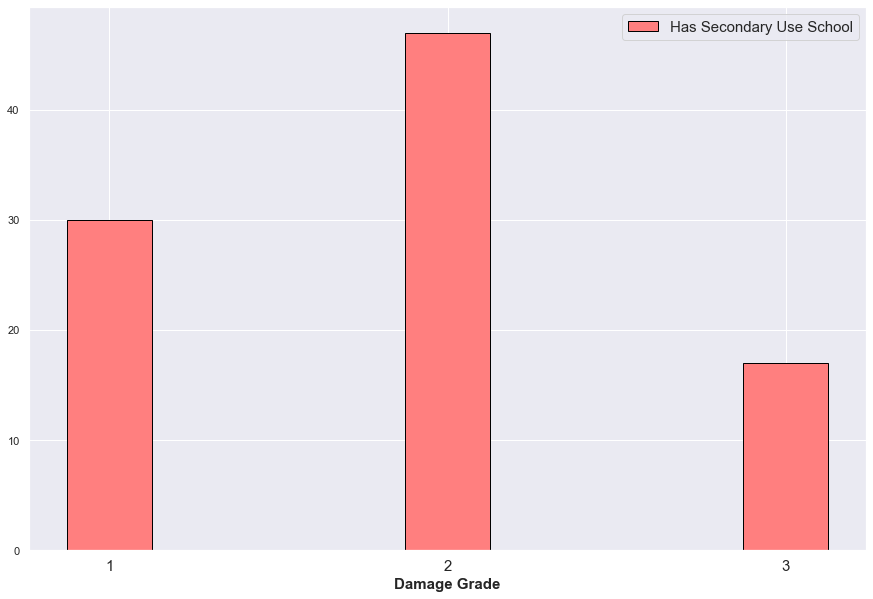

In [39]:
# Obtain the number of occurences for each instance of buildings with generic secondary school use.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use_school'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_school_list = [Y1, Y2, Y3]

for j in has_secondary_use_school_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_school_list[0], has_secondary_use_school_list[1], has_secondary_use_school_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use School')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with secondary use of school are likely to result in a lesser extent of damage.

Y1:  59 , Y2:  152 , Y3:  68
59
152
68


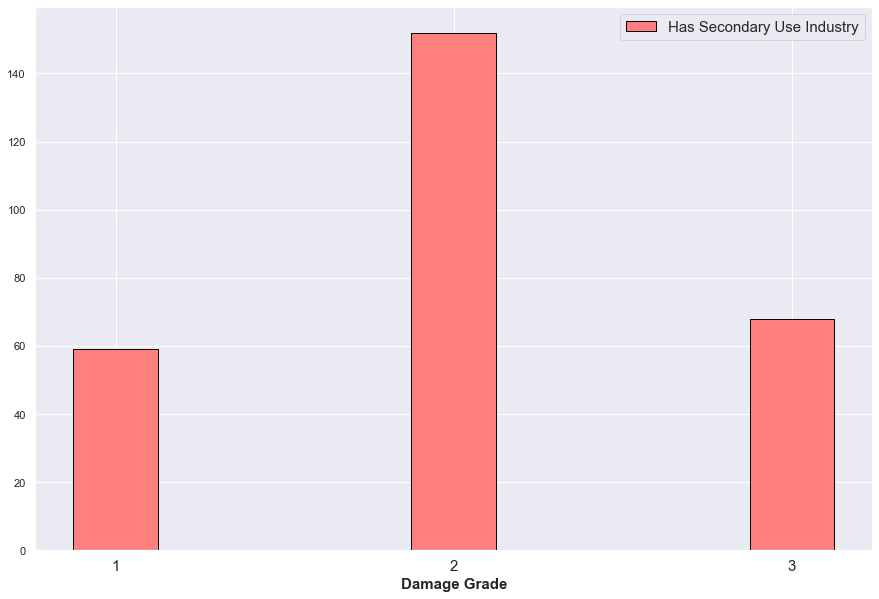

In [40]:
# Obtain the number of occurences for each instance of buildings with generic secondary industry use.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use_industry'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_industry_list = [Y1, Y2, Y3]

for j in has_secondary_use_industry_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_industry_list[0], has_secondary_use_industry_list[1], has_secondary_use_industry_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use Industry')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with secondary use of industry are likely to result in a greater extent of damage.

Y1:  12 , Y2:  32 , Y3:  5
12
32
5


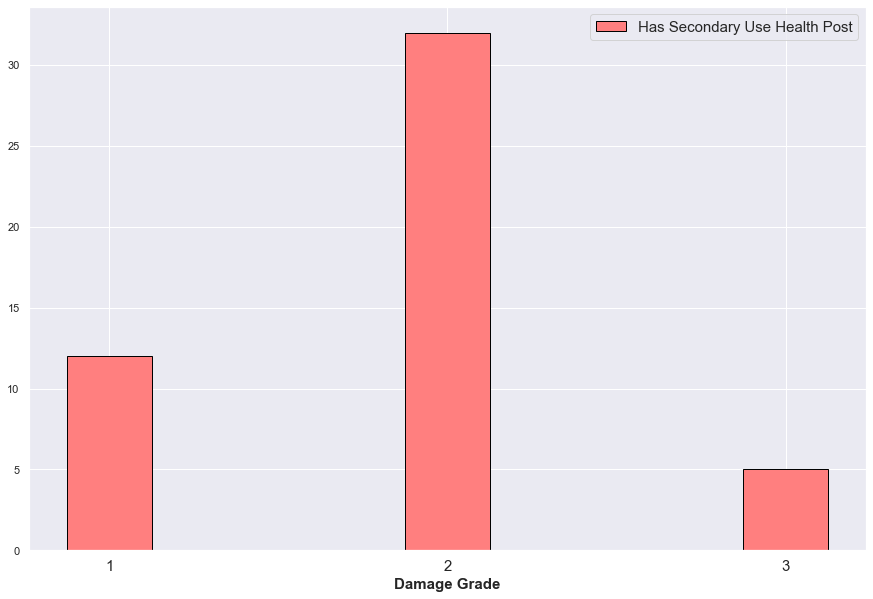

In [41]:
# Obtain the number of occurences for each instance of buildings with generic secondary health post use.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use_health_post'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_health_post_list = [Y1, Y2, Y3]

for j in has_secondary_use_health_post_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_health_post_list[0], has_secondary_use_health_post_list[1], has_secondary_use_health_post_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use Health Post')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with secondary use of health post are likely to result in a lesser extent of damage.

Y1:  13 , Y2:  21 , Y3:  4
13
21
4


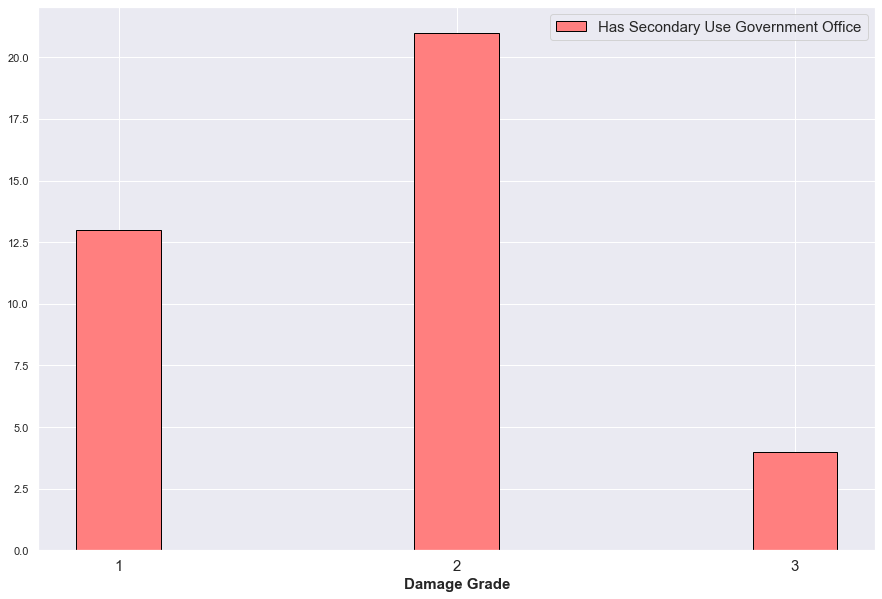

In [42]:
# Obtain the number of occurences for each instance of buildings with generic secondary government office use.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use_gov_office'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_gov_office_list = [Y1, Y2, Y3]

for j in has_secondary_use_gov_office_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_gov_office_list[0], has_secondary_use_gov_office_list[1], has_secondary_use_gov_office_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use Government Office')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with secondary use of government office are likely to result in a lesser extent of damage.

Y1:  4 , Y2:  12 , Y3:  7
4
12
7


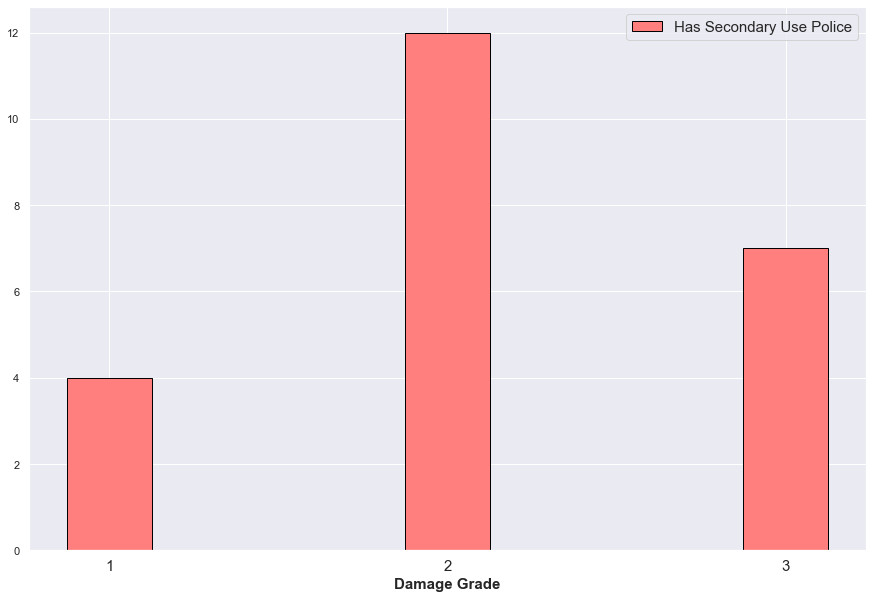

In [43]:
# Obtain the number of occurences for each instance of buildings with generic secondary police use.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use_use_police'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_police_list = [Y1, Y2, Y3]

for j in has_secondary_use_police_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_police_list[0], has_secondary_use_police_list[1], has_secondary_use_police_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use Police')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with secondary use of police are likely to result in a greater extent of damage.

Y1:  175 , Y2:  852 , Y3:  307
175
852
307


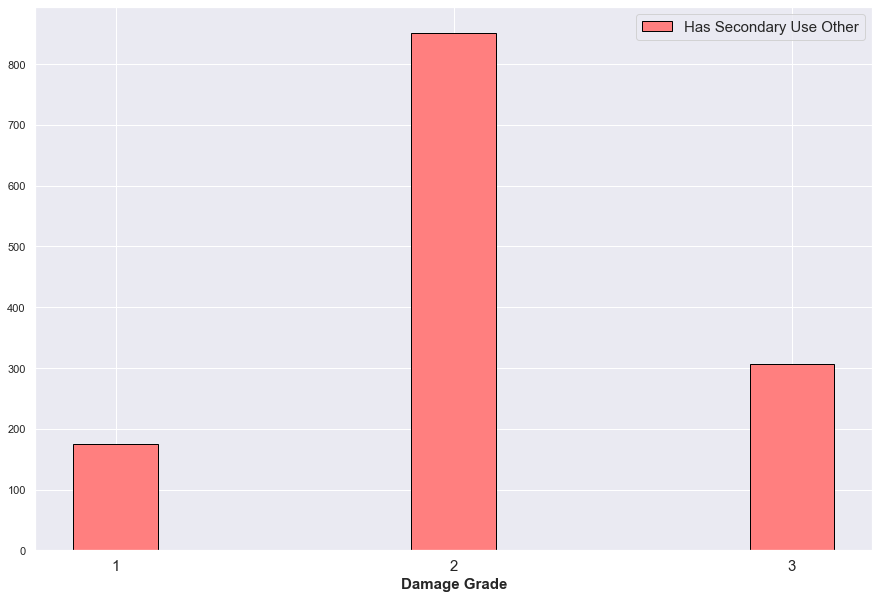

In [44]:
# Obtain the number of occurences for each instance of buildings with generic secondary other use.
i, Y1, Y2, Y3 = 0, 0, 0, 0

while(i <= 260600):
    
    if(earthquake_data['has_secondary_use_other'][i] == 1):
        if(earthquake_data['damage_grade'][i] == 1):
            Y1 += 1
        elif(earthquake_data['damage_grade'][i] == 2):
            Y2 += 1
        elif(earthquake_data['damage_grade'][i] == 3):
            Y3 += 1
    
    i += 1
    
print("Y1: ", Y1, ", Y2: ", Y2, ", Y3: ", Y3)

has_secondary_use_other_list = [Y1, Y2, Y3]

for j in has_secondary_use_other_list:
    print(j)

# Using a paired column plot to show the relationship. Set the width of the bar for each variable.
barWidth = 0.25

# Set the height of the bars based on the variables.
bars1 = [has_secondary_use_other_list[0], has_secondary_use_other_list[1], has_secondary_use_other_list[2]]

# Set the position of the bars on the x-axis.
r1 = np.arange(len(bars1))

# Set the size of the figure.
plt.figure(figsize = (15, 10))

# Create the plot, set the label and specify the bar hex colour code.
plt.bar(r1, bars1, color = '#FF7F7F', width = barWidth, edgecolor = 'black', label = 'Has Secondary Use Other')

# Add labels for the middle of each group of bars.
plt.xlabel('Damage Grade', fontweight = 'bold', fontsize = '15')

# Centering of the label for damage grade is adjusted by the value added to 'r'.
plt.xticks([r for r in range(len(bars1))], ['1', '2', '3'], fontsize = '15')

# Show plot with legend.
plt.legend(fontsize = '15')

# Conclusion for this plot:
# Buildings with secondary use of other are likely to result in a greater extent of damage.